In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
def upscale(original_mask):
    ref_lon_step = 1/12
    ref_lat_step = 1/12
    ref_north = 90
    ref_south = -90
    ref_west = -180
    ref_east = 180
    new_lon_step = 1/2
    new_lat_step = 1/2
    new_north = 90
    new_south = -90
    new_west = -180
    new_east = 180

    grid_count_lat = 360
    grid_count_lon = 720
    new_data = np.zeros((grid_count_lat, grid_count_lon))
    
    for i in range(grid_count_lat):
        for j in range(grid_count_lon):
            new_lat_start = new_north - i * new_lat_step
            new_lat_end = new_north - (i + 1) * new_lat_step
            new_lon_start = new_west + j * new_lon_step
            new_lon_end = new_west + (j + 1) * new_lon_step
    
            if new_lat_end < ref_south or new_lat_start > ref_north:
                continue
            if new_lon_end < ref_west or new_lon_start > ref_east:
                continue
    
            row_start = int((ref_north - new_lat_start) / ref_lat_step)
            row_end = int((ref_north - new_lat_end) / ref_lat_step)
            col_start = int((new_lon_start - ref_west) / ref_lon_step)
            col_end = int((new_lon_end - ref_west) / ref_lon_step)

            target_cells = original_mask[row_start+1:row_end+1, col_start:col_end]
            non_zero_values = target_cells[target_cells != 0]
            
            if non_zero_values.size > 0:
                print(non_zero_values)
                new_data[i, j-1] = non_zero_values.min()

    return new_data
    
def upscale(original_mask):
    ref_lon_step = 1/12
    ref_lat_step = 1/12
    ref_north = 90
    ref_south = -90
    ref_west = -180
    ref_east = 180
    new_lon_step = 1/2
    new_lat_step = 1/2
    new_north = 90
    new_south = -90
    new_west = -180
    new_east = 180

    grid_count_lat = 360
    grid_count_lon = 720
    new_data = np.zeros((grid_count_lat, grid_count_lon))
    
    for i in range(grid_count_lat):
        for j in range(grid_count_lon):
            target_cells = original_mask[i*6:(i+1)*6, j*6:(j+1)*6]
            non_zero_values = target_cells[target_cells != 0]
            
            if non_zero_values.size > 0:
                print(non_zero_values)
                new_data[i, j] = non_zero_values.min()

    return new_data

In [3]:
msk_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_clrd0000.gl5'
save_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/pst/krishna_30arcmin/city_clrd0000.hlf'
org_ctymsk = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
upscaled_ctymsk = upscale(org_ctymsk)
#upscaled_ctymsk.astype(np.float32).tofile(save_path)

[1362. 1362. 1362.]
[1362. 1362. 1362. 1362. 1362. 1362. 1362. 1362.]
[1362. 1362. 1362. 1362.]
[1554. 1554. 1554. 1554. 1554. 1554. 1554. 1554. 1554. 1554. 1554. 1554.
 1554.]
[1554. 1554. 1554.]
[1554. 1554. 1554. 1554.]
[506. 506. 506. 506. 506. 506. 506.]
[506.]
[385. 385. 385. 385. 385. 385. 385. 385. 385. 385. 385. 385. 385. 385.
 385. 385. 385.]
[385. 385. 385. 385. 385. 385. 385. 385. 385.]
[68. 68. 68. 68. 68. 68. 68.]
[506. 506. 506. 506. 506. 506.]
[506. 506. 506. 506. 506. 506. 506. 506. 506. 506. 506. 506. 506. 506.
 506. 506.]
[506. 506. 506.]
[68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68.
 68.]
[68. 68. 68. 68. 68. 68.]
[329. 329. 329. 329. 329. 329. 329. 329. 329. 329.]
[329. 329. 329. 329. 329. 329. 329. 329.]
[1199. 1199. 1199. 1199. 1199. 1199. 1199.]
[1534. 1534. 1534. 1534. 1534. 1534.]
[1534.]
[1585. 1585. 1585. 1585. 1585.]
[1001. 1001. 1001. 1001. 1001. 1001. 1001. 1001. 1001. 1001. 1001.]
[1001. 1001. 1001. 1001. 1001. 1001. 1001. 1001

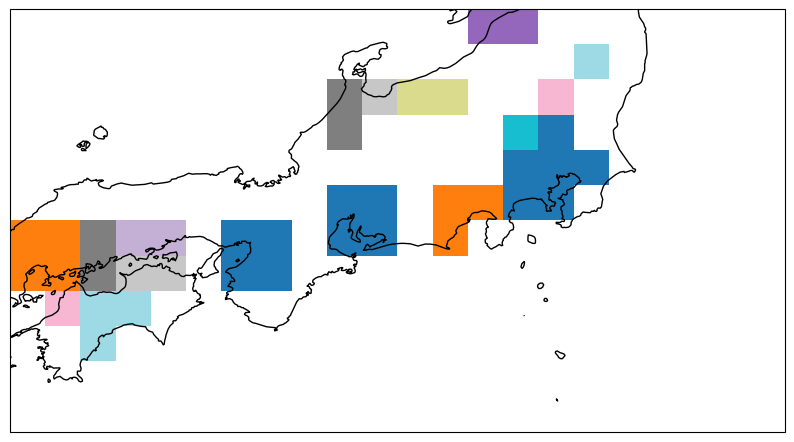

In [71]:
def geography_30min(one, twho, three, four):
    #
    a = 360
    b = 720
    #
    resolution = 2
    upperindex = (90-four)*resolution
    lowerindex = (90-three)*resolution
    leftindex = (180+one)*resolution
    rightindex = (180+two)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)  
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
# めちゃくちゃずれてる
#drawings
one = 132
two = 143
three = 32
four = 38

upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography_30min(one, two, three, four)

resized_cropped = upscaled_ctymsk[upperindex:lowerindex, leftindex:rightindex]
resized_masked = np.ma.masked_where(resized_cropped==0, resized_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(resized_masked,
               extent=img_extent, transform=projection,
               cmap='tab20')
ax.coastlines()
plt.show()

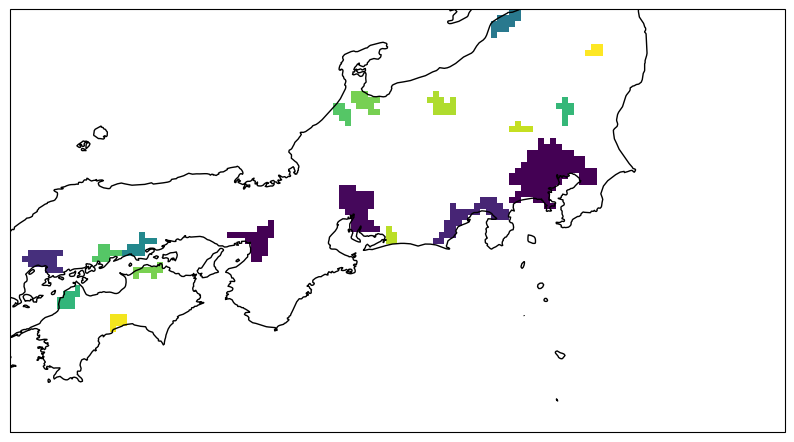

In [51]:
def geography_5min(one, twho, three, four):
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    resolution = 12
    upperindex = (90-four)*resolution
    lowerindex = (90-three)*resolution
    leftindex = (180+one)*resolution
    rightindex = (180+two)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)  
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
# めちゃくちゃずれてる
#drawings
one = 132
two = 143
three = 32
four = 38

upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography_5min(one, two, three, four)
org_ctymsk_cropped = org_ctymsk[upperindex:lowerindex, leftindex:rightindex]
org_ctymsk_masked = np.ma.masked_where(org_ctymsk_cropped == 0, org_ctymsk_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(org_ctymsk_masked,
               extent=img_extent, transform=projection)
ax.coastlines()
plt.show()